In [1]:
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv("../.env")

boston = os.getenv("LOCAL_BOSTON_DS")
paris = os.getenv("local_paris_ds")

df_b = pd.read_csv(boston)
df_p = pd.read_csv(paris)

In [2]:
df_p.head(1)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5


In [3]:
df_b.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [4]:
df_p.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [5]:
df_p.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [6]:
df_p.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [7]:
df_b.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [2]:
df_b['rm'] = df_b['rm'].fillna(df_b['rm'].median())

In [3]:
x_b = df_b.drop(columns=['medv'])
y_b = df_b['medv']

x_p = df_p.drop(columns=['price'])
y_p = df_p['price']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_b, y_b, test_size=0.2, random_state=42)
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_p, y_p, test_size=0.2, random_state=42)

scaler = StandardScaler()

x_train_b_scaled = scaler.fit_transform(x_train_b)
x_test_b_scaled = scaler.fit_transform(x_test_b)

x_train_p_scaled = scaler.fit_transform(x_train_p)
x_test_p_scaled = scaler.fit_transform(x_test_p)

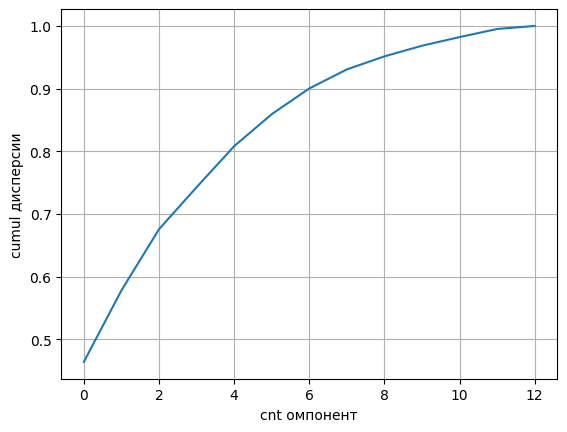

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(x_train_b_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('cnt омпонент')
plt.ylabel('cumul дисперсии')
plt.grid(True)
plt.show()

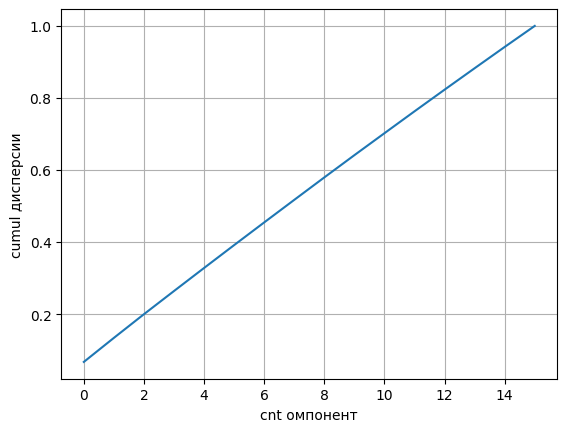

In [6]:
pca = PCA()
pca.fit(x_train_p_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('cnt омпонент')
plt.ylabel('cumul дисперсии')
plt.grid(True)
plt.show()

In [7]:
pca = PCA(n_components=0.95)
x_train_b_pca = pca.fit_transform(x_train_b_scaled)
x_test_b_pca = pca.fit_transform(x_test_b_scaled)

x_train_p_pca = pca.fit_transform(x_train_p_scaled)
x_test_p_pca = pca.fit_transform(x_test_p_scaled)

In [14]:
x_train_b_pca.shape[1]

9

In [15]:
x_train_p_pca.shape[1]

16

In [16]:
x_train_b_scaled.shape[1]

13

In [17]:
x_train_p_scaled.shape[1]

16

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers

model_b_scaled = keras.Sequential([
    layers.Input(shape=(x_train_b_scaled.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.15),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

opt_b = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_b_scaled.compile(optimizer=opt_b, loss='mse', metrics=['mae'])

rlr_b = ReduceLROnPlateau('val_loss', factor=0.5, patience=8, min_lr=1e-6)
es_b  = EarlyStopping('val_loss', patience=12, restore_best_weights=True)

history_b_scaled = model_b_scaled.fit(
    x_train_b_scaled, y_train_b,
    validation_data=(x_test_b_scaled, y_test_b),
    epochs=200,
    batch_size=16,
    verbose=1,
    callbacks=[rlr_b, es_b]
)

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 626.8014 - mae: 23.2575 - val_loss: 545.6957 - val_mae: 21.7540 - learning_rate: 1.0000e-04
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 611.3818 - mae: 22.9237 - val_loss: 532.3325 - val_mae: 21.4554 - learning_rate: 1.0000e-04
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 598.8564 - mae: 22.6449 - val_loss: 519.7703 - val_mae: 21.1736 - learning_rate: 1.0000e-04
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 587.4580 - mae: 22.3862 - val_loss: 507.2858 - val_mae: 20.8861 - learning_rate: 1.0000e-04
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 573.7103 - mae: 22.0758 - val_loss: 492.5976 - val_mae: 20.5477 - learning_rate: 1.0000e-04
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 557.6588 - mae: 21.7179 - val_loss: 474.6697 - val_mae: 20.1284 - learning_rate: 1.0000e-04
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 536.7562 - mae: 21.2380 - val_loss:

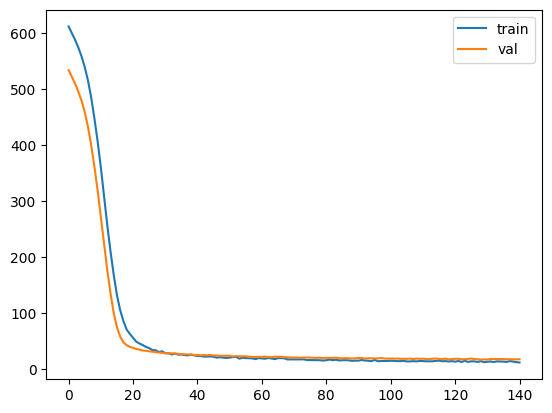

In [19]:
plt.plot(history_b_scaled.history['loss'], label='train')
plt.plot(history_b_scaled.history['val_loss'], label='val')
plt.legend(); plt.show()

In [11]:
import neptune.new as neptune

neptune_api = os.getenv("neptune_api_token")

run = neptune.init_run(
    project="isaakclarke/lesson-13",
    api_token=neptune_api
)

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/isaakclarke/lesson-13/e/LES-6


In [20]:
model_p_scaled = keras.Sequential([
    layers.Input(shape=(x_train_p_scaled.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.01),
    layers.Dense(1)
])
opt_p = tf.keras.optimizers.Adam(learning_rate=0.001)

model_p_scaled.compile(optimizer=opt_p, loss='mse', metrics=['mae'])

rlr_p = ReduceLROnPlateau('val_loss', factor=0.5, patience=8, min_lr=1e-6)
es_p = EarlyStopping('val_loss', patience=12, restore_best_weights=True)

history_p_scaled = model_p_scaled.fit(
    x_train_p_scaled,
    y_train_p,
    validation_data=(x_test_p_scaled, y_test_p),
    epochs=200,
    batch_size=16,
    verbose=1,
    callbacks=[rlr_p, es_p]
)

Epoch 1/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32782768144384.0000 - mae: 4962963.5000 - val_loss: 34820826595328.0000 - val_mae: 5106322.5000 - learning_rate: 0.0010
Epoch 2/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32584182530048.0000 - mae: 4947697.0000 - val_loss: 34420635467776.0000 - val_mae: 5076846.5000 - learning_rate: 0.0010
Epoch 3/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31942311411712.0000 - mae: 4899384.5000 - val_loss: 33475795091456.0000 - val_mae: 5008121.0000 - learning_rate: 0.0010
Epoch 4/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30707810304000.0000 - mae: 4806885.0000 - val_loss: 31869341007872.0000 - val_mae: 4890615.0000 - learning_rate: 0.0010
Epoch 5/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 28829066199040.0000 - mae: 4663329.5000 - val_loss: 29607858274304.0000 - val_mae: 4721387.0000 - learning_rate: 0.0010
Epoch 6/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26346218586112.0000 - mae: 4467559

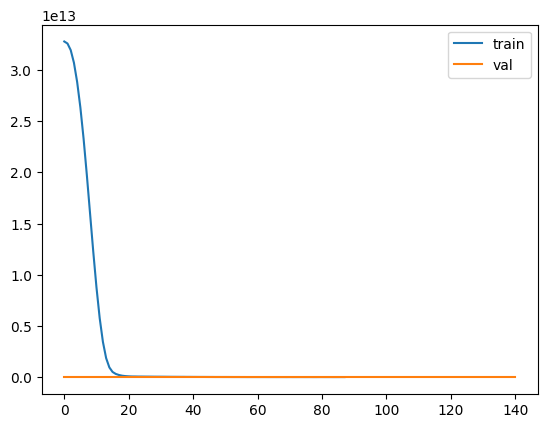

In [21]:
plt.plot(history_p_scaled.history['loss'], label='train')
plt.plot(history_b_scaled.history['val_loss'], label='val')
plt.legend(); plt.show()

In [28]:
model_b_pca = keras.Sequential([
    layers.Input(shape=(x_train_b_pca.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1)
])

opt_b = tf.keras.optimizers.Adam(learning_rate=0.001)

model_b_pca.compile(optimizer=opt_b, loss='mse', metrics=['mae'])

rlr_b = ReduceLROnPlateau('val_loss', factor=0.5, patience=10, min_lr=1e-6)
es_b  = EarlyStopping('val_loss', patience=20, restore_best_weights=True)

history_b_pca = model_b_pca.fit(
    x_train_b_pca, y_train_b,
    validation_data=(x_test_b_pca, y_test_b),
    epochs=200,
    batch_size=128,
    verbose=1,
    callbacks=[rlr_b, es_b]
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 587.5070 - mae: 22.2748 - val_loss: 508.6208 - val_mae: 20.8285 - learning_rate: 0.0010
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 581.7470 - mae: 22.1426 - val_loss: 503.1313 - val_mae: 20.6971 - learning_rate: 0.0010
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 575.7663 - mae: 22.0067 - val_loss: 497.4906 - val_mae: 20.5605 - learning_rate: 0.0010
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 569.5912 - mae: 21.8661 - val_loss: 491.6750 - val_mae: 20.4185 - learning_rate: 0.0010
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 563.2819 - mae: 21.7203 - val_loss: 485.6643 - val_mae: 20.2706 - learning_rate: 0.0010
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 556.4399 - mae: 21.5630 - val_loss: 479.4019 - val_mae: 20.1148 - learning_rate: 0.0010
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 549.3138 - mae: 21.3960 - val_loss: 472.7603 - val_mae: 19.9479 - 

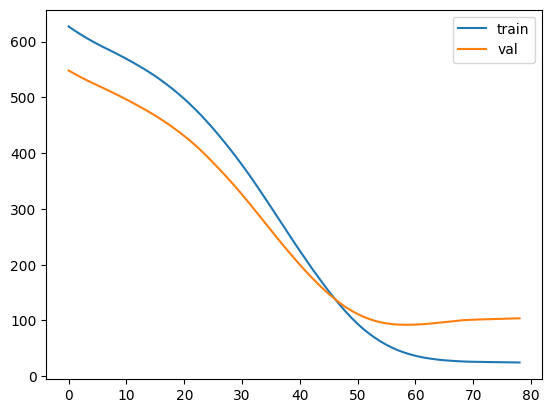

In [23]:
plt.plot(history_b_pca.history['loss'], label='train')
plt.plot(history_b_pca.history['val_loss'], label='val')
plt.legend(); plt.show()

In [26]:
model_p_pca = keras.Sequential([
    layers.Input(shape=(x_train_p_pca.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.01),
    layers.Dense(1)
])
opt_p = tf.keras.optimizers.Adam(learning_rate=0.001)

model_p_pca.compile(optimizer=opt_p, loss='mse', metrics=['mae'])

rlr_p = ReduceLROnPlateau('val_loss', factor=0.5, patience=8, min_lr=1e-6)
es_p = EarlyStopping('val_loss', patience=12, restore_best_weights=True)

history_p_pca = model_p_pca.fit(
    x_train_p_pca,
    y_train_p,
    validation_data=(x_test_p_pca, y_test_p),
    epochs=200,
    batch_size=16,
    verbose=1,
    callbacks=[rlr_p, es_p]
)

Epoch 1/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 32780633243648.0000 - mae: 4962931.5000 - val_loss: 34824746172416.0000 - val_mae: 5105924.0000 - learning_rate: 0.0010
Epoch 2/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32515190423552.0000 - mae: 4944977.0000 - val_loss: 34423240130560.0000 - val_mae: 5070537.5000 - learning_rate: 0.0010
Epoch 3/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31598263140352.0000 - mae: 4883812.0000 - val_loss: 33444744658944.0000 - val_mae: 4984384.0000 - learning_rate: 0.0010
Epoch 4/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 29834761732096.0000 - mae: 4764059.0000 - val_loss: 31834245169152.0000 - val_mae: 4842445.5000 - learning_rate: 0.0010
Epoch 5/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27167081627648.0000 - mae: 4575688.5000 - val_loss: 29630908071936.0000 - val_mae: 4646827.5000 - learning_rate: 0.0010
Epoch 6/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23731455918080.0000 - mae: 4317358

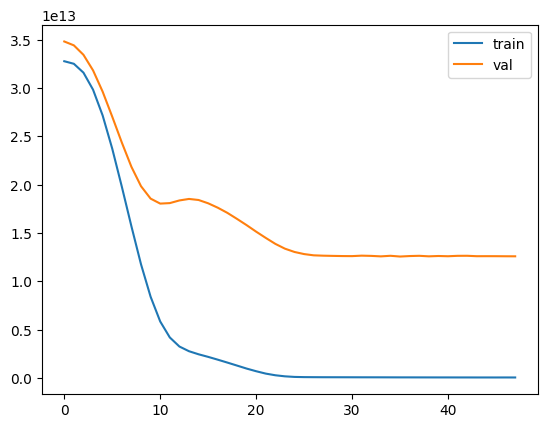

In [27]:
plt.plot(history_p_pca.history['loss'], label='train')
plt.plot(history_p_pca.history['val_loss'], label='val')
plt.legend(); plt.show()

In [23]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

In [25]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(x_train_p_pca.shape[1],)))

    for _ in range(hp.Int('layersCNT', 1, 3)):
        model.add(
            layers.Dense(
                units=hp.Choice('units', [8, 16, 32, 64, 128]),
                activation='relu'
            )
        )
        model.add(
            layers.Dropout(
                rate=hp.Choice('dropout', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
            )
        )

    model.add(layers.Dense(1))

    lr = hp.Float('lr', 1e-5, 1e-3, sampling='log')
    opt = Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])
    return model

class NeptuneCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            run["train/loss"].log(logs.get("loss"))
            run["train/mae"].log(logs.get("mae"))
            run["val/loss"].log(logs.get("val_loss"))
            run["val/mae"].log(logs.get("val_mae"))

tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='tuning_pca'
)

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True),
    NeptuneCallback()
]

tuner.search(
    x_train_p_pca,
    y_train_p,
    validation_data=(x_test_p_pca, y_test_p),
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print(f"best: {best_hp.values}")

run.stop()

Trial 20 Complete [00h 01m 23s]
val_mae: 5058590.5

Best val_mae So Far: 2876590.75
Total elapsed time: 00h 26m 22s
best: {'layersCNT': 3, 'units': 32, 'dropout': 0.1, 'lr': 0.0007579949073069253}
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 48 operations to synchronize with Neptune. Do not kill this process.


C:\Users\ayzek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


[neptune] [info   ] All 48 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/isaakclarke/lesson-13/e/LES-6/metadata


In [28]:
# омг, короче keras_tuner нельзя просто подружить с нептуном, hyperopt на py 3.12 не работает без костылей